<a href="https://colab.research.google.com/github/Jyoti1706/Deep_Reinforcement_Learning/blob/main/PartB_Assignment2_DRL_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade gym==0.22.0
! pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708362 sha256=d5959a0993e85dd323d9cc1044a5925a243209516fc2e61e3c38459b40d074c4
  Stored in directory: /root/.cache/pip/wheels/42/e8/e8/6dfbc92a1dcd76c1a5e2bb982750fd6b7e792239f46039e6b1
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [12]:
! pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


In [20]:
!pip install tensorflow-probability

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from collections import deque
import random
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import tensorflow_probability as tfp

In [4]:
df = pd.read_csv('/content/sample_data/data.csv')
df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume',
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [6]:
df.shape

(1391, 12)

In [7]:
df.dtypes

Open Time               int64
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Close Time              int64
Quote Asset Volume    float64
Number of Trades        int64
TB Base Volume        float64
TB Quote Volume       float64
Ignore                  int64
dtype: object

#### Preprocessing Data

In [8]:
df['Open Time'] = pd.to_datetime(df['Open Time']/1000, unit='s')
df['Close Time'] = pd.to_datetime(df['Close Time']/1000, unit='s')

In [9]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, axis=1)
df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1386,2024-02-29 21:30:00,3336.18,3350.99,3310.00,3347.74,19460.3656,2024-02-29 21:59:59.999000064,6.483155e+07,55743,9201.2964,3.066464e+07,0
1387,2024-02-29 22:00:00,3347.73,3358.53,3315.01,3316.31,11211.1396,2024-02-29 22:29:59.999000064,3.742420e+07,32296,5434.2090,1.814413e+07,0
1388,2024-02-29 22:30:00,3316.31,3331.95,3300.00,3322.61,13394.8046,2024-02-29 22:59:59.999000064,4.439002e+07,36633,5588.5946,1.852359e+07,0
1389,2024-02-29 23:00:00,3322.60,3352.57,3319.18,3351.69,8171.7785,2024-02-29 23:29:59.999000064,2.729118e+07,25131,4451.8032,1.486792e+07,0
1390,2024-02-29 23:30:00,3351.68,3358.97,3339.20,3340.09,6463.8102,2024-02-29 23:59:59.999000064,2.166333e+07,20075,3208.8539,1.075639e+07,0


In [10]:
df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                         int64
dtype: object

In [11]:
df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1.391000e+03,1391.000000,1391.000000,1.391000e+03,1391.0
mean,2725.495967,2733.052480,2717.899892,2726.254666,8714.839560,2.475143e+07,22945.367362,4438.398117,1.259927e+07,0.0
std,329.672475,332.512582,326.392078,329.871235,7988.915274,2.511701e+07,15566.207996,4144.808754,1.297082e+07,0.0
min,2245.190000,2256.710000,2240.000000,2245.190000,956.408900,2.204044e+06,3873.000000,408.534600,9.412927e+05,0.0
25%,2424.340000,2428.525000,2421.160000,2424.500000,4020.627650,1.008759e+07,13180.000000,1974.782400,5.110490e+06,0.0
50%,2776.410000,2781.990000,2768.210000,2776.660000,6375.695000,1.743592e+07,19056.000000,3193.163600,8.631213e+06,0.0
75%,2953.415000,2961.400000,2945.350000,2953.645000,10673.601650,3.028241e+07,28124.500000,5525.907150,1.548738e+07,0.0
max,3513.880000,3522.810000,3481.430000,3513.870000,118990.957300,3.940600e+08,234651.000000,57037.736900,1.887229e+08,0.0


In [13]:
import mplfinance as mpf
df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2024-02-27 22:29:59.999000064,2024-02-27 22:00:00,3247.99,3268.34,3243.68,3263.67,6853.4149,2.232435e+07,23765,3883.7261,1.264988e+07,0
2024-02-27 22:59:59.999000064,2024-02-27 22:30:00,3263.66,3263.67,3246.15,3247.65,4011.4401,1.305024e+07,15158,1788.8346,5.821138e+06,0
2024-02-27 23:29:59.999000064,2024-02-27 23:00:00,3247.65,3249.95,3239.13,3246.00,4099.6409,1.330328e+07,20020,2124.0353,6.892754e+06,0
2024-02-27 23:59:59.999000064,2024-02-27 23:30:00,3246.01,3247.18,3236.85,3242.36,4713.5823,1.527994e+07,17561,2157.1582,6.991814e+06,0
2024-02-28 00:29:59.999000064,2024-02-28 00:00:00,3242.35,3244.71,3236.00,3243.09,3723.8018,1.206724e+07,18382,1758.2708,5.698315e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 21:59:59.999000064,2024-02-29 21:30:00,3336.18,3350.99,3310.00,3347.74,19460.3656,6.483155e+07,55743,9201.2964,3.066464e+07,0
2024-02-29 22:29:59.999000064,2024-02-29 22:00:00,3347.73,3358.53,3315.01,3316.31,11211.1396,3.742420e+07,32296,5434.2090,1.814413e+07,0
2024-02-29 22:59:59.999000064,2024-02-29 22:30:00,3316.31,3331.95,3300.00,3322.61,13394.8046,4.439002e+07,36633,5588.5946,1.852359e+07,0


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


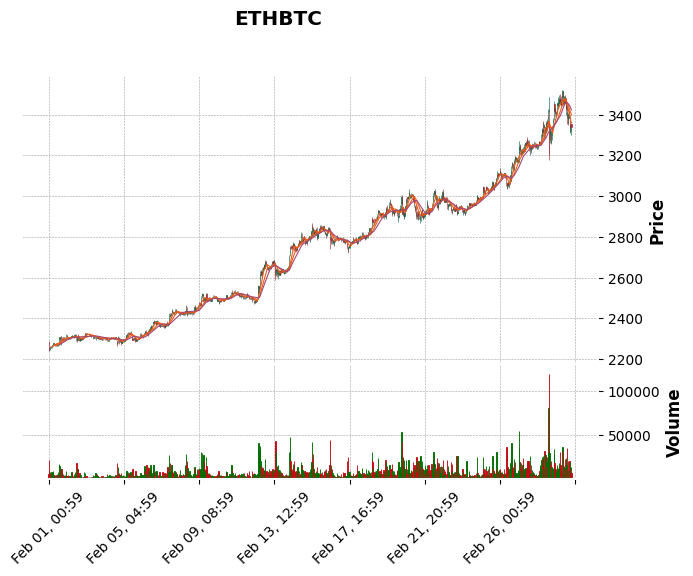

In [14]:
mpf.plot(df.set_index('Close Time'),
        type='candle', style='charles',
        volume=True,
        title='ETHBTC',
        mav=(10,20,30))

In [16]:
name = 'DDQN-learning agent'

class QNetwork(tf.keras.Model):
    def __init__(self, state_size, action_size, hidden_size=128):
        super(QNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.dense2 = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.dense3 = tf.keras.layers.Dense(action_size, activation=None)

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

class Agent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []
        self.gamma = 0.95
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        tf.reset_default_graph()
        self.model = QNetwork(state_size, action_size)
        self.target_model = QNetwork(state_size, action_size)
        self.target_model.set_weights(self.model.get_weights())
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        self.sess.run(tf.global_variables_initializer())
    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                #target[action] += self.gamma * np.amax(Q_new[i])
                target = reward + self.gamma * tfp.math.reduce_max(self.target_model(np.array([next_state]))[0])
            X[i] = self.model(np.array([state])).numpy()
            Y[i] = target
            self.model.compile(loss='mse', optimizer=self.optimizer)
            self.model.fit(np.array([state]), X[i], epochs=1, verbose=0)
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest,
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

In [17]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size,
              window_size = window_size,
              trend = close,
              skip = skip,
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

<ipython-input-16-5c08ca154759>:21: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
<ipython-input-16-5c08ca154759>:22: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  self.logits = tf.layers.dense(feed, self.action_size)


epoch: 10, total rewards: 535.660000.3, cost: 0.904670, total money: 10535.660000
epoch: 20, total rewards: 443.460000.3, cost: 0.267246, total money: 10443.460000
epoch: 30, total rewards: 444.080000.3, cost: 3.599300, total money: 10444.080000
epoch: 40, total rewards: 462.670000.3, cost: 0.157310, total money: 10462.670000
epoch: 50, total rewards: 481.990000.3, cost: 0.127103, total money: 10481.990000
epoch: 60, total rewards: 319.180000.3, cost: 0.103420, total money: 10319.180000
epoch: 70, total rewards: 403.700000.3, cost: 0.275534, total money: 10403.700000
epoch: 80, total rewards: 353.090000.3, cost: 0.077055, total money: 10353.090000
epoch: 90, total rewards: 398.480000.3, cost: 0.067696, total money: 10398.480000
epoch: 100, total rewards: 482.550000.3, cost: 0.060863, total money: 10482.550000
epoch: 110, total rewards: 461.420000.3, cost: 0.050295, total money: 10461.420000
epoch: 120, total rewards: 374.020000.3, cost: 0.053659, total money: 10374.020000
epoch: 130, t

In [18]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = 100000)

day 3: buy 1 unit at price 2255.390000, total balance 97744.610000
day 4, sell 1 unit at price 2260.500000, investment 0.226568 %, total balance 100005.110000,
day 13: buy 1 unit at price 2277.110000, total balance 97728.000000
day 14, sell 1 unit at price 2271.960000, investment -0.226164 %, total balance 99999.960000,
day 33: buy 1 unit at price 2306.500000, total balance 97693.460000
day 34, sell 1 unit at price 2304.710000, investment -0.077607 %, total balance 99998.170000,
day 37: buy 1 unit at price 2294.540000, total balance 97703.630000
day 40, sell 1 unit at price 2299.460000, investment 0.214422 %, total balance 100003.090000,
day 53: buy 1 unit at price 2304.440000, total balance 97698.650000
day 54, sell 1 unit at price 2301.660000, investment -0.120637 %, total balance 100000.310000,
day 55: buy 1 unit at price 2302.040000, total balance 97698.270000
day 56, sell 1 unit at price 2298.340000, investment -0.160727 %, total balance 99996.610000,
day 68: buy 1 unit at price 2

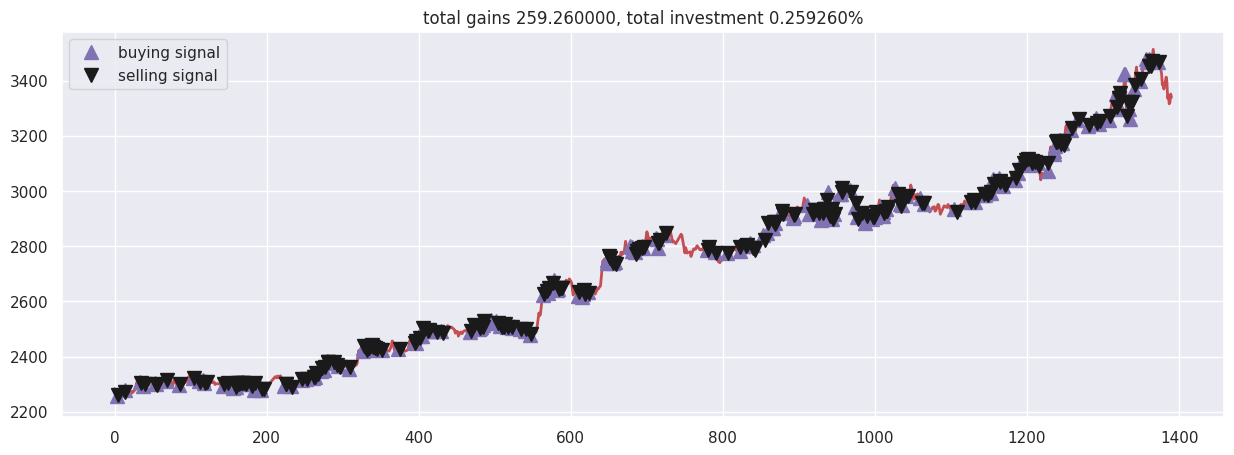

In [19]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig(name+'.png')
plt.show()